In [123]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns


In [125]:
# Load dataset
data = pd.read_csv('/Users/jaylee/Downloads/bank+marketing/bank/bank-full.csv', delimiter=';')

# Encode categorical variables
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# Encode the target variable 'y' (yes/no to 1/0)
label_encoder = LabelEncoder()
data_encoded['y'] = label_encoder.fit_transform(data_encoded['y'])

# Split features and target variable
X = data_encoded.drop('y', axis=1)
y = data_encoded['y']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [127]:
# Step 1: Train KNN classifier and evaluate performance

# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'K-Nearest Neighbors Accuracy: {accuracy:.4f}')

K-Nearest Neighbors Accuracy: 0.8949


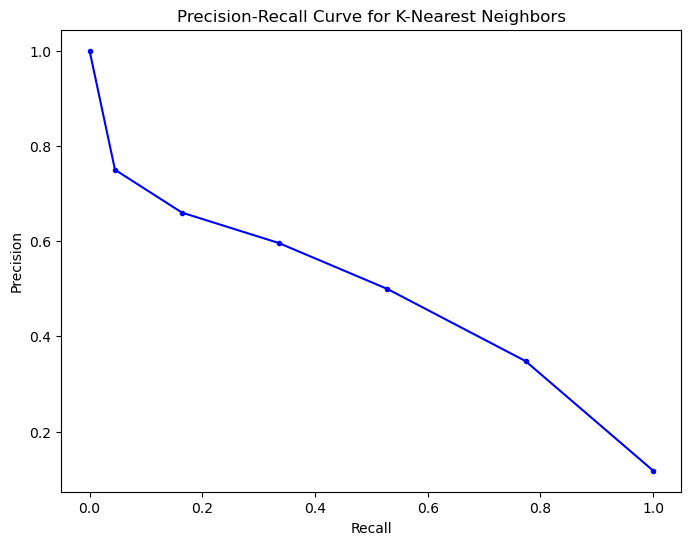

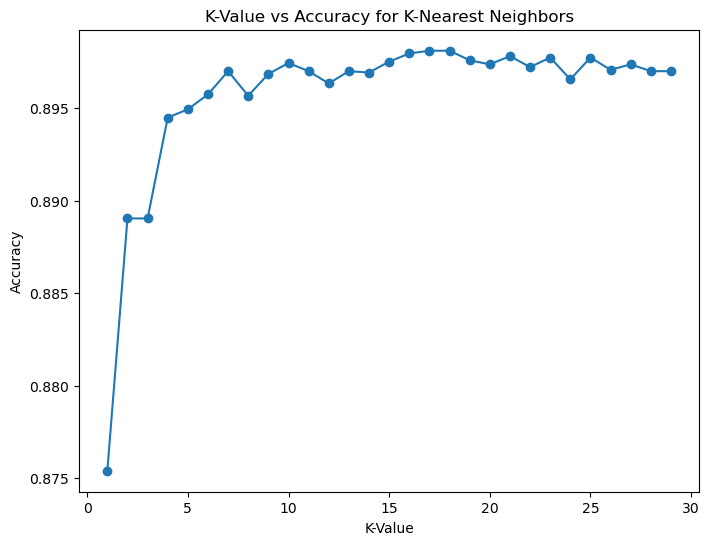

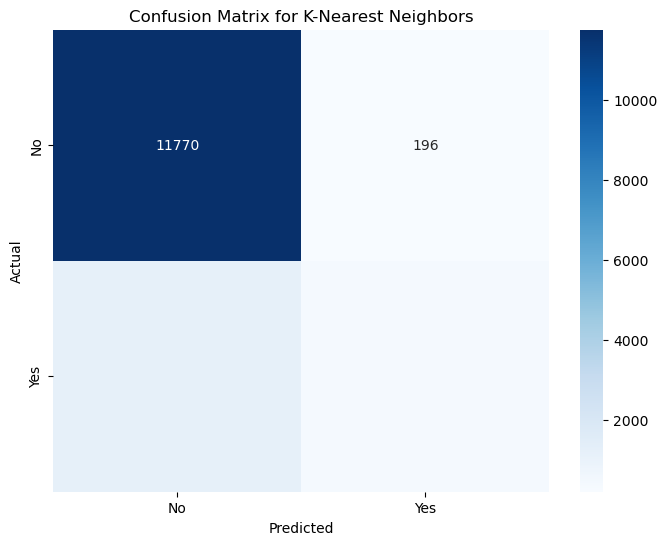

In [129]:
# Step 3: \Visualization

# Get probabilities for precision-recall curve
y_prob = knn.predict_proba(X_test)[:, 1]

# Compute precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', color='blue')
plt.title('Precision-Recall Curve for K-Nearest Neighbors')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

# K-Value vs Accuracy Plot
k_values = range(1, 30)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

# Plot K-value vs Accuracy
plt.figure(figsize=(8, 6))
plt.plot(k_values, accuracies, marker='o')
plt.title('K-Value vs Accuracy for K-Nearest Neighbors')
plt.xlabel('K-Value')
plt.ylabel('Accuracy')
plt.show()

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix for K-Nearest Neighbors')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Logistic Regression Accuracy: 0.9000


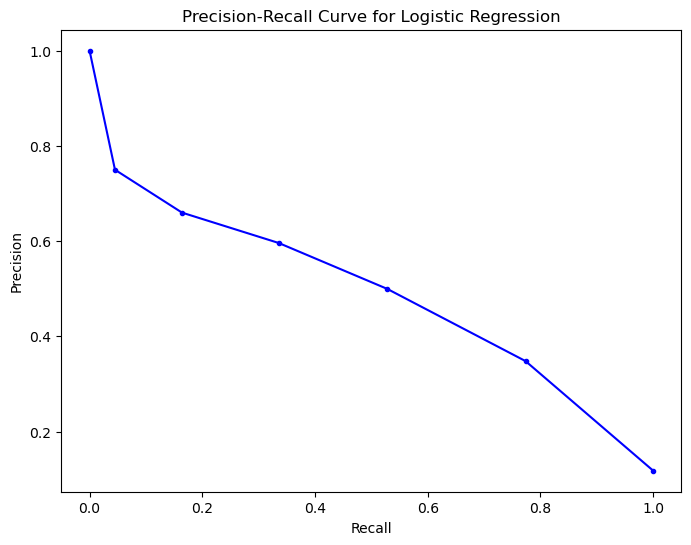

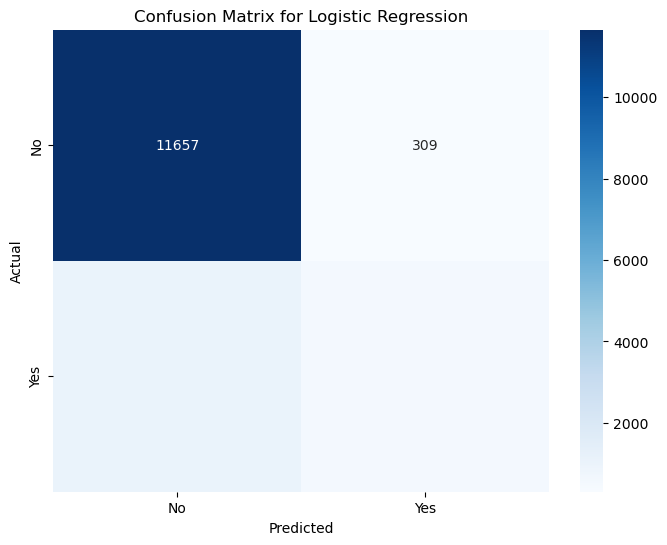

In [130]:
# Initialize the Logistic Regression classifier
log_reg = LogisticRegression()

# Train the model
log_reg.fit(X_train, y_train)

# Make predictions
y_pred = log_reg.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Logistic Regression Accuracy: {accuracy:.4f}')

# Step 3: Visualization

# Compute precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', color='blue')
plt.title('Precision-Recall Curve for Logistic Regression')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()



# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Decision Tree Accuracy: 0.8739


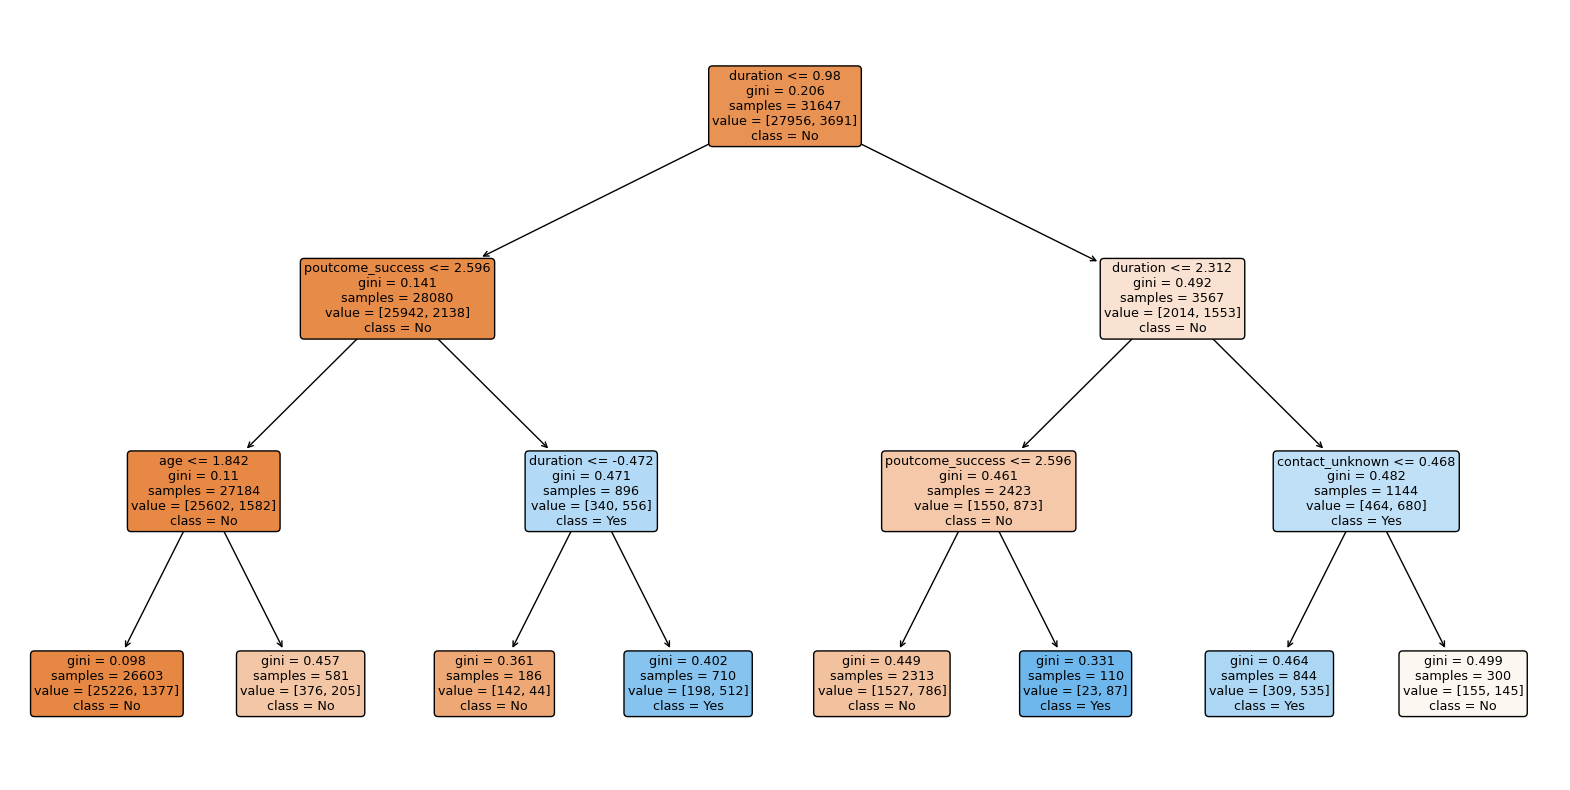

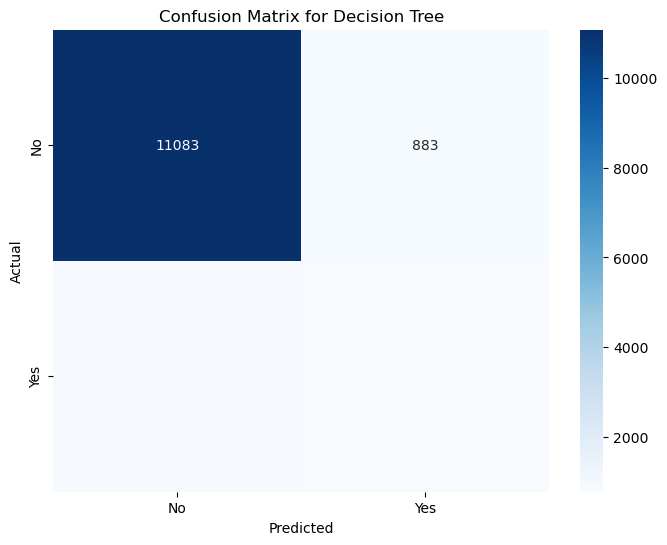

In [133]:
# Initialize the Decision Tree classifier
decision_tree = DecisionTreeClassifier()

# Train the model
decision_tree.fit(X_train, y_train)

# Make predictions
y_pred = decision_tree.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Decision Tree Accuracy: {accuracy:.4f}')

# Step 3: Visualization

# Limit the depth of the decision tree for visualization purposes
decision_tree_limited = DecisionTreeClassifier(max_depth=3)  # Limiting the depth to 3 levels
decision_tree_limited.fit(X_train, y_train)

# Visualizing the simplified decision tree
plt.figure(figsize=(20, 10))
plot_tree(decision_tree_limited, feature_names=X.columns, class_names=['No', 'Yes'], filled=True, rounded=True)
plt.show()

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix for Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [135]:
# Train SVM classifier and evaluate performance

# Initialize the SVM classifier
svm = SVC(probability=True)

# Train the model
svm.fit(X_train, y_train)

# Make predictions
y_pred = svm.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Support Vector Machine Accuracy: {accuracy:.4f}')

Support Vector Machine Accuracy: 0.9050


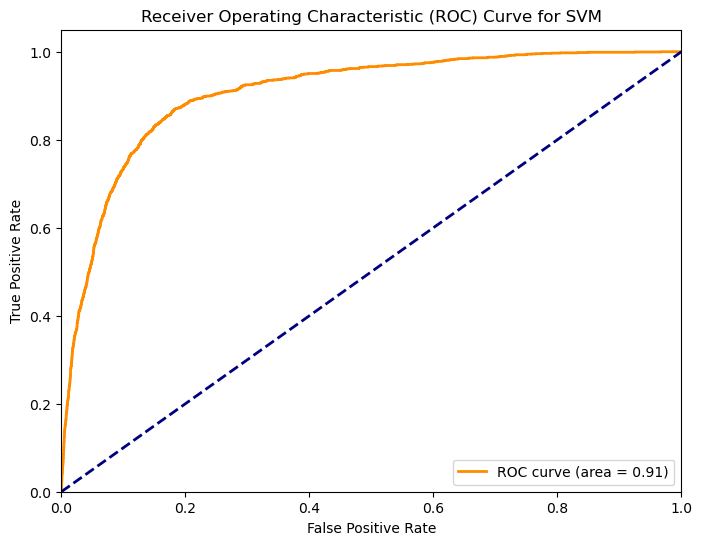

In [136]:
# Visualization
# Get prediction probabilities for ROC curve
y_prob = svm.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for SVM')
plt.legend(loc="lower right")
plt.show()



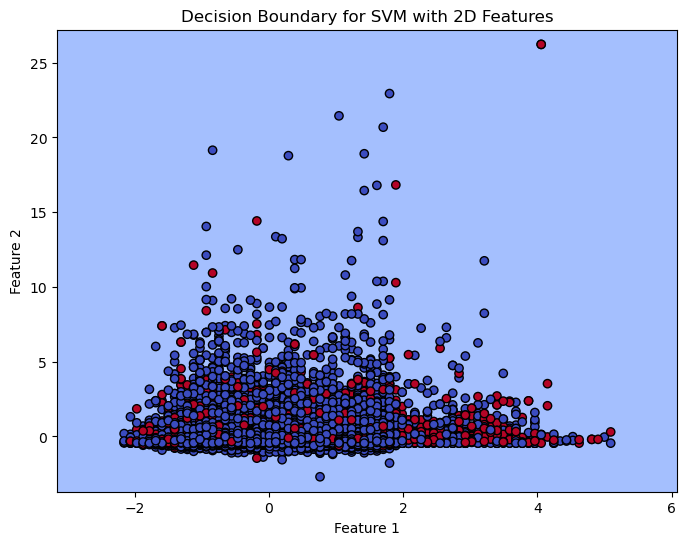

In [142]:
# Use the 2D feature set from the training data only
X_train_2d = X_train[:, :2]  # Taking only the first 2 features from the training data

# Train the SVM classifier with 2D training data
svm_2d = SVC(kernel='linear', C=1.0)
svm_2d.fit(X_train_2d, y_train)

# Plot the decision boundary
plt.figure(figsize=(8, 6))
h = .02  # step size in the mesh
x_min, x_max = X_train_2d[:, 0].min() - 1, X_train_2d[:, 0].max() + 1
y_min, y_max = X_train_2d[:, 1].min() - 1, X_train_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = svm_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary and scatter the training data
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_train, cmap=plt.cm.coolwarm, edgecolors='k')
plt.title('Decision Boundary for SVM with 2D Features')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

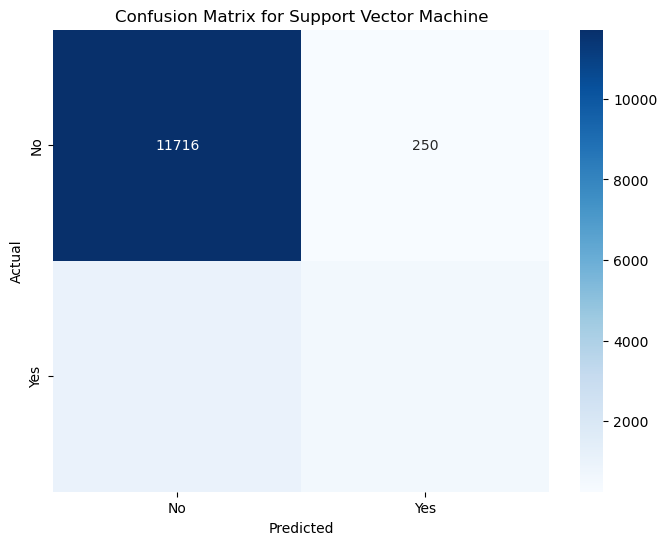

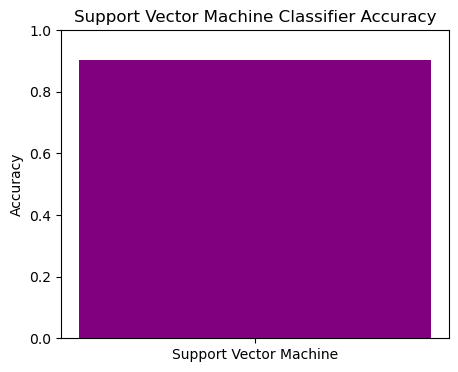

In [140]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix for Support Vector Machine')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot the accuracies (Just SVM)
plt.figure(figsize=(5, 4))
plt.bar(['Support Vector Machine'], [accuracy], color='purple')
plt.title('Support Vector Machine Classifier Accuracy')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.show()